<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/SVM_Fermi_Surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


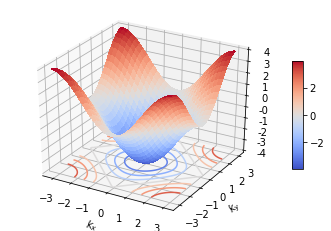

In [203]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(-np.pi, np.pi, 0.1)
Y = np.arange(-np.pi, np.pi, 0.1)

X, Y = np.meshgrid(X, Y)
Z = -2*(np.cos(X)+np.cos(Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=-4, cmap=cm.coolwarm)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


In [204]:
N=50
mu=0    #fermi energy

In [205]:
kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
X=np.array([kx_list[:,0], ky_list[:,0]])
X=X.T

In [206]:
E=[float(-2*(np.cos(kx_list[i])+np.cos(ky_list[i]))) for i in range(N)]
#print(E)

In [207]:
occupancy=[E[i]<=mu for i in range(N)]
#print(occupancy)
y = np.where(occupancy,1.,-1.).reshape((N,1))
#print(y)

In [208]:
X_b = np.c_[np.ones((N,1)),X]
n=X_b.shape[1]
theta = np.random.random((n,1))

In [209]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta,reg=0):
    m = float(len(y))
    theta2 = np.square(theta)
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [210]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]
    
    fx = np.multiply(y,(X_b.dot(theta)))
    
    check = np.less(fx,np.ones(fx.shape))
    
    check = np.where(check==True,1,0)
    
    return check

def subgradient_descent(X,y,theta,iterations=100,reg=0):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    
    X_b = np.c_[np.ones((len(X),1)),X]
    
    cost_history = np.zeros(iterations)
    
    theta_history = np.zeros((iterations,X_b.shape[1]))
    
    for it in range(iterations):
        alpha = 1/(reg*(it+1))
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)
        
    return theta, cost_history, theta_history

In [211]:
reg = 0.0001
n_iter = 20000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg)
print(theta)
print('Final Cost is :', cost_history[-1])

[[14907.40717179]
 [-4748.72572956]
 [-4610.9730123 ]]
Final Cost is : 266.04225676033667


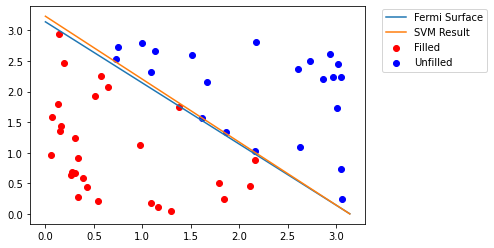

In [212]:
x_plot=np.array([0, np.pi])
plt.plot(x_plot,-x_plot+np.pi,label='Fermi Surface')
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot, (-theta[1]*x_plot-theta[0])/theta[2],label='SVM Result')
plt.legend(loc=(1.05,0.7))